# UnZaimer Data Science Intern

## Answers for Questions 2, 3 and 4

## Basic EDA follwed by answers

In [76]:
pwd

'c:\\Users\\gokul\\Desktop\\UnZaimer'

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [78]:
datae = pd.read_csv('listings.csv')
datae.head()

id                                               name  host_id  \
0  2265   Zen-East in the Heart of Austin (monthly rental)     2466   
1  5245  Eco friendly, Colorful, Clean, Cozy monthly share     2466   
2  5456          Walk to 6th, Rainey St and Convention Ctr     8028   
3  5636         Soco, Barton Springs Private Guest Cottage     7148   
4  5769                                     NW Austin Room     8186   

   host_name  neighbourhood_group  neighbourhood  latitude  longitude  \
0      Paddy                  NaN          78702  30.27750  -97.71398   
1      Paddy                  NaN          78702  30.27577  -97.71379   
2     Sylvia                  NaN          78702  30.26112  -97.73448   
3      Peggy                  NaN          78704  30.24630  -97.76361   
4  Elizabeth                  NaN          78729  30.45697  -97.78422   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    200               7                 24  2019-03-16   
1     Private room    114              30                  9  2018-03-14   
2  Entire home/apt    104               2                543  2021-02-01   
3  Entire home/apt     46              30                 21  2020-11-06   
4     Private room     39               1                259  2021-02-10   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.17                               3               131  
1               0.06                               3                 0  
2               3.74                               1               354  
3               0.15                               2                67  
4               1.96                               1                79

In [79]:
datae['calculated_host_listings_count'].unique()

array([  3,   1,   2,  11,   4,  10,   5,  12,   9,  19,   7,  13,  23,
        29,   6,  16,  20,   8,  38,  81,  17,  18,  82,  56,  28,  26,
        24,  43,  15,  25, 131,  45,  32,  48, 358,  40], dtype=int64)

In [80]:
#printing unique values of each features
for col in datae.columns:
    print( datae[col].name,datae[col].unique())

id [    2265     5245     5456 ... 48109299 48109324 48111525]
name ['Zen-East in the Heart of Austin (monthly rental)'
 'Eco friendly, Colorful, Clean, Cozy monthly share'
 'Walk to 6th, Rainey St and Convention Ctr' ...
 'Lake Austin Home With A View~Private/Pool/HotTub'
 'Remote Work 1BD Apartment in Southwest Austin'
 'Cozy East Austin Home - Walk to Parks and Trails']
host_id [     2466      8028      7148 ... 357555761  72699326 387977994]
host_name ['Paddy' 'Sylvia' 'Peggy' ... 'Evonify' 'Gayanne' 'Eliza']
neighbourhood_group [nan]
neighbourhood [78702 78704 78729 78759 78741 78703 78757 78727 78731 78758 78744 78705
 78722 78725 78701 78751 78723 78752 78736 78732 78746 78745 78754 78730
 78724 78753 78756 78749 78735 78721 78734 78739 78733 78737 78748 78738
 78726 78717 78750 78728 78712 78742 78747 78719]
latitude [30.2775  30.27577 30.26112 ... 30.18973 30.22767 30.25853]
longitude [-97.71398 -97.71379 -97.73448 ... -97.77244 -97.84869 -97.83537]
room_type ['Entire home/apt

In [81]:
datae.neighbourhood_group.unique()

array([nan])

In [82]:
#As name and neighbourhood group is not need for the analysis, we drop them
del datae['name']
del datae['neighbourhood_group']

In [83]:
datae.head()

id  host_id  host_name  neighbourhood  latitude  longitude  \
0  2265     2466      Paddy          78702  30.27750  -97.71398   
1  5245     2466      Paddy          78702  30.27577  -97.71379   
2  5456     8028     Sylvia          78702  30.26112  -97.73448   
3  5636     7148      Peggy          78704  30.24630  -97.76361   
4  5769     8186  Elizabeth          78729  30.45697  -97.78422   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt    200               7                 24  2019-03-16   
1     Private room    114              30                  9  2018-03-14   
2  Entire home/apt    104               2                543  2021-02-01   
3  Entire home/apt     46              30                 21  2020-11-06   
4     Private room     39               1                259  2021-02-10   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.17                               3               131  
1               0.06                               3                 0  
2               3.74                               1               354  
3               0.15                               2                67  
4               1.96                               1                79

### Outlier detection using box plots of numeric variables

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='id'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='host_id'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='neighbourhood'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='latitude'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='longitude'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='price'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='minimum_nights'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='number_of_reviews'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='reviews_per_month'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='calculated_host_listings_count'>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='availability_365'>

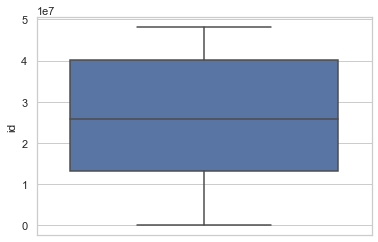

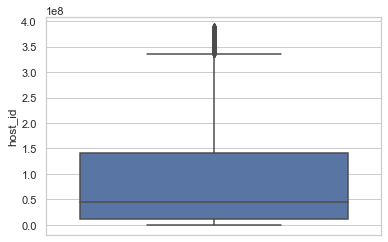

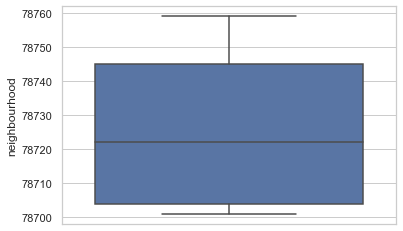

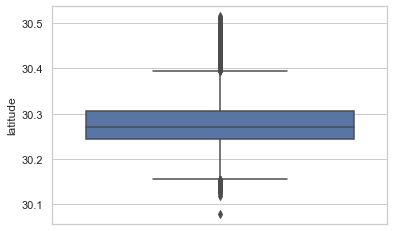

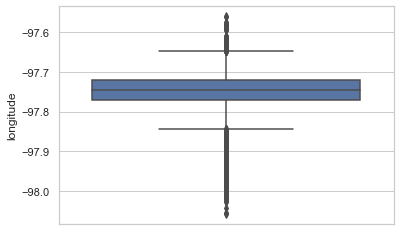

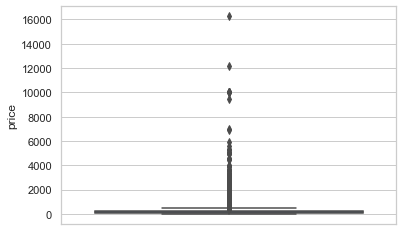

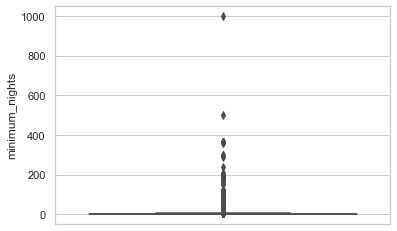

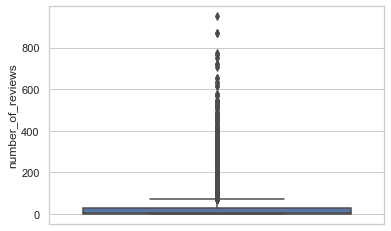

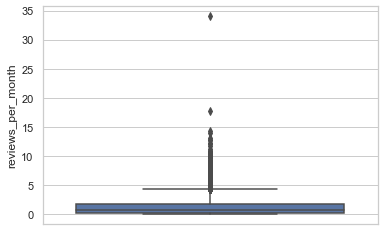

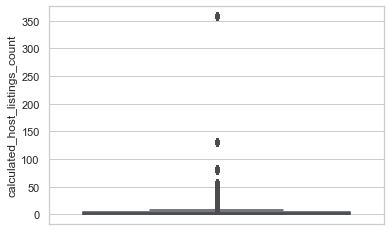

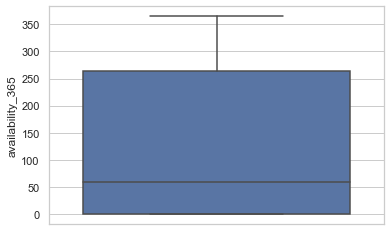

In [84]:
#Outlier detection using box plots of numeric variables
df1 = datae.select_dtypes([np.int64, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.boxplot(y=col, data=df1)

Most of the features in the summary listing data is skewed.

### Finding each elements ratio in their respective feature

In [85]:
#Finding each elements ratio in their respective feature
for col in datae.columns:
    print(col)
    print('-------------------------')
    print(datae[col].value_counts()/np.float(len(datae)))
    print()

id
-------------------------
43780180    0.000097
36071439    0.000097
29896995    0.000097
22687071    0.000097
40183134    0.000097
              ...   
47409556    0.000097
23392843    0.000097
20826811    0.000097
9737869     0.000097
37011456    0.000097
Name: id, Length: 10272, dtype: float64

host_id
-------------------------
359036978    0.034852
104309976    0.012753
109638288    0.007983
8167447      0.007886
118565935    0.005452
               ...   
2463926      0.000097
91394231     0.000097
9676984      0.000097
42272508     0.000097
288666605    0.000097
Name: host_id, Length: 6773, dtype: float64

host_name
-------------------------
Kia                         0.038746
WanderJaunt                 0.012753
TurnKey Vacation Rentals    0.012072
Martin                      0.009833
Michael                     0.009540
                              ...   
Angie & James               0.000097
Kyle & Bryttie              0.000097
Aneka                       0.000097
Rich     

### Missing value imputation

In [86]:
#Finding no of missing values in each feature
for col in datae.columns:
    print(datae[col].name,  pd.isnull(datae[col]).sum())

id 0
host_id 0
host_name 5
neighbourhood 0
latitude 0
longitude 0
room_type 0
price 0
minimum_nights 0
number_of_reviews 0
last_review 2600
reviews_per_month 2600
calculated_host_listings_count 0
availability_365 0


In [87]:
#Separating categories and numerical in the data 
cat_cols = datae.select_dtypes(include='object').columns
print(cat_cols.shape)
print(cat_cols)

num_cols = datae.select_dtypes(include=['number']).columns
print(num_cols.shape)
print(num_cols)

(3,)
Index(['host_name', 'room_type', 'last_review'], dtype='object')
(11,)
Index(['id', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [88]:
#Get all cols that contains NAs
cols_have_na = datae.columns[(datae.isnull().sum() != 0)]
datae[cols_have_na].isnull().sum().sort_values(ascending = False)

reviews_per_month    2600
last_review          2600
host_name               5
dtype: int64

In [89]:
#Imputing missing values
for c in cols_have_na:
    if c in num_cols:
        datae[c].fillna(np.ceil(datae[c].mean()), inplace = True)
    elif c in cat_cols:
        datae[c].fillna(datae[c].mode()[0], inplace = True)

In [90]:
datae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   host_id                         10272 non-null  int64  
 2   host_name                       10272 non-null  object 
 3   neighbourhood                   10272 non-null  int64  
 4   latitude                        10272 non-null  float64
 5   longitude                       10272 non-null  float64
 6   room_type                       10272 non-null  object 
 7   price                           10272 non-null  int64  
 8   minimum_nights                  10272 non-null  int64  
 9   number_of_reviews               10272 non-null  int64  
 10  last_review                     10272 non-null  object 
 11  reviews_per_month               10272 non-null  float64
 12  calculated_host_listings_count  

## Question no 2 answer

In [117]:
import plotly.express as px
fig = px.scatter_mapbox(datae, lat="latitude", lon="longitude", color="room_type", zoom=9, mapbox_style='open-street-map')
fig.show()


### Additional analysis for question no 2

### Heat map

In [92]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([30.26715, -97.74306],zoom_start=11.4)
HeatMap(datae[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

### Host listing count

In [93]:
fig = px.scatter_mapbox(datae, lat="latitude", lon="longitude", color="calculated_host_listings_count", zoom=9, mapbox_style='open-street-map')
fig.show()

## Question no 3 answer

Text(0.5, 1.0, 'Number of Listings by Top 10 Hosts')

Text(0.5, 0, 'Host id')

Text(0, 0.5, 'Number of Listings in Austin')

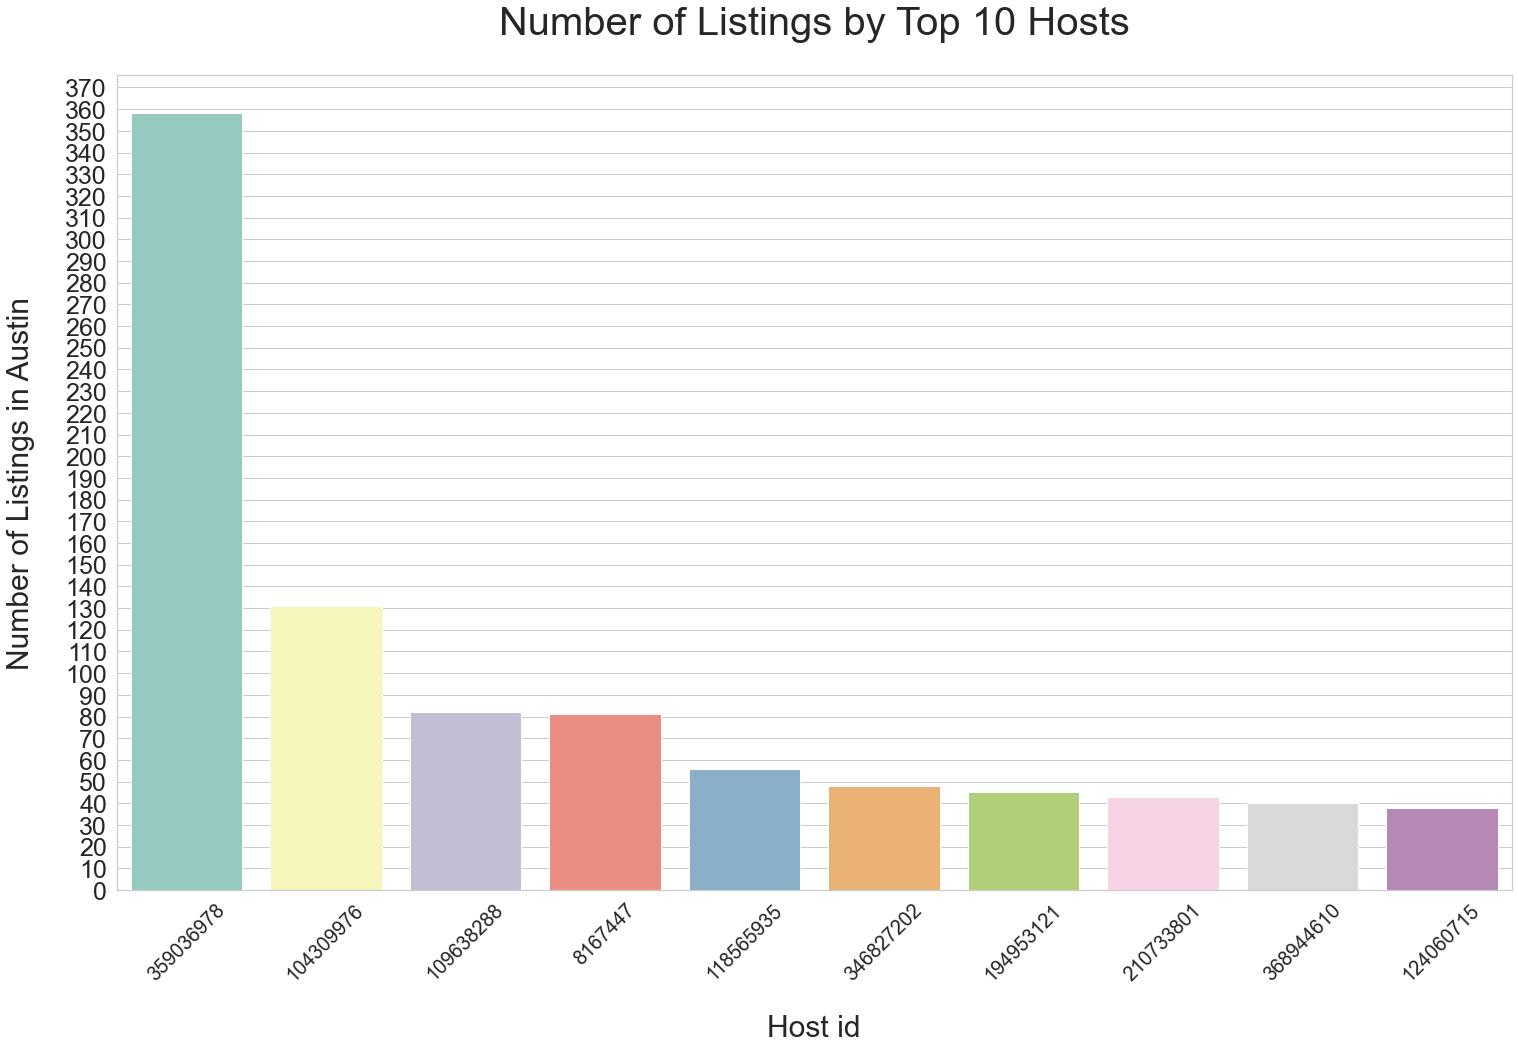

In [94]:
import matplotlib.ticker as ticker
sns.set(style="whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(25, 15)
ax.axes.set_title("Number of Listings by Top 10 Hosts",fontsize=40,pad=40)
ax = sns.countplot(x='host_id',data=datae, order = datae['host_id'].value_counts().iloc[:10].index, palette="Set3")
ax.set_xlabel('Host id',fontsize=30,labelpad=30)
ax.set_ylabel('Number of Listings in Austin',fontsize=30,labelpad=30)
ax.xaxis.set_tick_params(labelsize=20, rotation = 45)
ax.yaxis.set_tick_params(labelsize=25)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

Host id '359036978' holds the most no of listings in the Austin

## Question no 4 answer

## Some of Insights in data and model builing 

In [95]:
datae.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='room_type', ylabel='count'>

Text(0.5, 1.0, 'Counts for room types')

Text(0.5, 0, 'Room types')

Text(0, 0.5, 'Count')

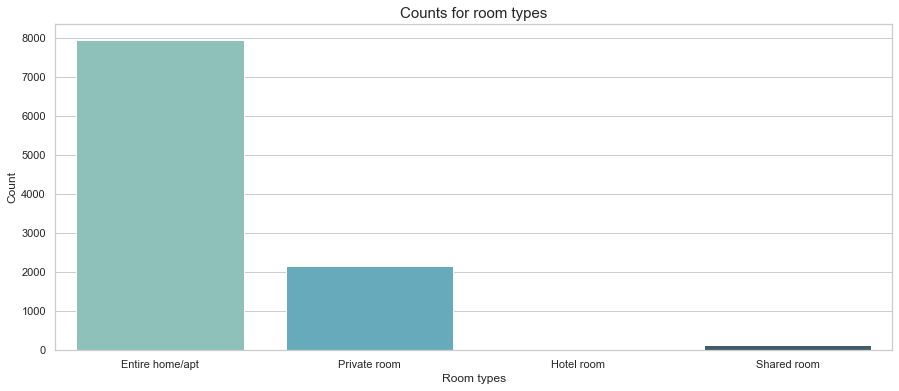

In [96]:
#Count on types of room
plt.figure(figsize=(15,6))
sns.countplot(data=datae, x='room_type', palette='GnBu_d')
plt.title('Counts for room types', fontsize=15)
plt.xlabel('Room types')
plt.ylabel("Count")

In [97]:
# Let us now take a look at the price range of the properties
print("--- Price Per Night ---")
print("Minimum Price in $:", min(datae['price']))
print("Maximum Price in $:", max(datae['price']))
print("Average Price in $:", datae['price'].mean())

--- Price Per Night ---
Minimum Price in $: 0
Maximum Price in $: 16264
Average Price in $: 255.65654205607476


In [98]:
# No of listings a particular host has
print("Minimum number of listings a particular host has:", datae['calculated_host_listings_count'].min())
print("Maximum number of listings a particular host has:", datae['calculated_host_listings_count'].max())

Minimum number of listings a particular host has: 1
Maximum number of listings a particular host has: 358


<Figure size 2160x2160 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1c088609220>,
 [Text(-0.17054931577149857, 1.0866981783779126, '3'),
  Text(-0.824356277147702, -0.7283108734099616, '1'),
  Text(-0.2628701486999836, -1.068128870933863, '2'),
  Text(0.07261499359336875, -1.0976005934334379, '11'),
  Text(0.31383604749814675, -1.0542802925649046, '4'),
  Text(0.49584931077119354, -0.9819029794270575, '10'),
  Text(0.5996108393820321, -0.9222075912155435, '5'),
  Text(0.6637506985021706, -0.8771744468678285, '12'),
  Text(0.7143418000589584, -0.8364901629358992, '9'),
  Text(0.7583119461655099, -0.7968456514926068, '19'),
  Text(0.7980045359614447, -0.7570923065154997, '7'),
  Text(0.834740056026926, -0.7163860962247693, '13'),
  Text(0.86836994786632, -0.675228578810646, '23'),
  Text(0.8990042474087138, -0.6338701469079391, '29'),
  Text(0.9267653781684001, -0.592541925797983, '6'),
  Text(0.9519544550337166, -0.5511648714690186, '16'),
  Text(0.9740497963398169, -0.5111037020511214, '20'),
  Text(0.9931622853910591, 

(-1.1106101269213131,
 1.1005052444589285,
 -1.1012198284582175,
 1.110848904019539)

Text(0.5, 1.0, 'Listings a host has on Airbnb')

<Figure size 2160x2160 with 0 Axes>

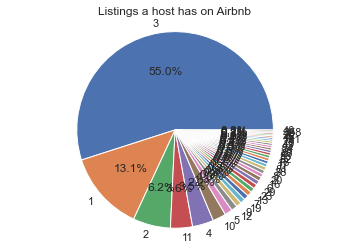

In [99]:
# Visualizing the percentage of listings most host have
labels = datae['calculated_host_listings_count'].unique()
sizes = datae['calculated_host_listings_count'].value_counts()*100

plt.figure(figsize = (30,30))
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Listings a host has on Airbnb')


plt.show()

<Figure size 720x432 with 0 Axes>

C:\Users\gokul\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='longitude', ylabel='latitude'>

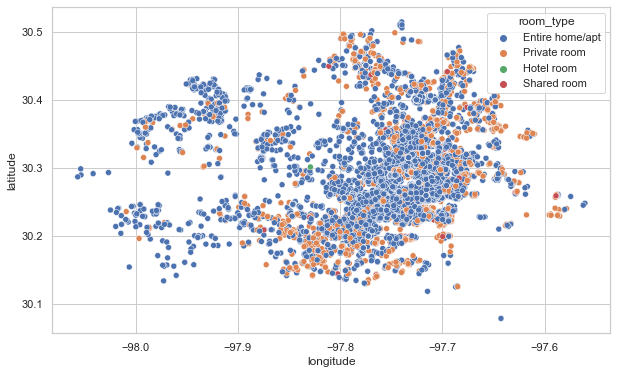

In [118]:
plt.figure(figsize=(10,6))
sns.scatterplot(datae.longitude,datae.latitude,hue=datae.room_type)
plt.ioff()

We can see that half of the people have listed 3

C:\Users\gokul\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1547: MatplotlibDeprecationWarning:

normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 



<AxesSubplot:ylabel='room_type'>

Text(0.5, 1.0, 'Room types availability in AirBnB')

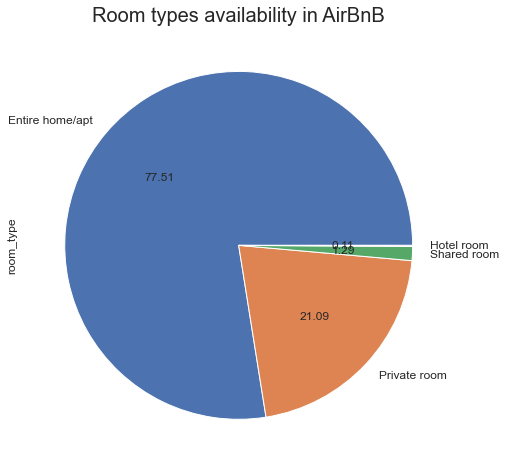

In [100]:
#Each type room's ratio on total count of rooms
b=datae.room_type.value_counts()/len(datae.room_type)
b.plot.pie(autopct='%.2f',fontsize=12,figsize=(8,8))
plt.title('Room types availability in AirBnB',fontsize=20)

### Average price of each of the room types in Austin

In [101]:
# Grouping based on room types
private_room = datae['room_type'] == 'Private room'
entire_home = datae['room_type'] == 'Entire home/apt'
shared_room = datae['room_type'] == 'Shared room'

# Calculating the avergae price in each neighbourhood
private_avg = datae[private_room]['price'].mean()
entire_avg = datae[entire_home]['price'].mean()
shared_avg = datae[shared_room]['price'].mean()


print("--- Average Price of the Room Types ---")
print("Private Room:",private_avg)
print("Entire Home/Apt:",entire_avg)
print("Shared room:", shared_avg)

--- Average Price of the Room Types ---
Private Room: 112.04755309325947
Entire Home/Apt: 297.38432554634517
Shared room: 68.89473684210526


### Details of sorted hosts rendering expensive rooms

In [102]:
#Details of sorted hosts rendering expensive rooms
expensive2 = datae.sort_values(by = 'price', ascending = False)
expensive2.head(10)

id    host_id     host_name  neighbourhood  latitude  longitude  \
9303  46081394  210733801         Above          78733  30.34225  -97.87717   
6940  36868625  210733801         Above          78733  30.33663  -97.84794   
3375  17607193   54561793          Adam          78723  30.29395  -97.69562   
4508  23003072     384732        Andres          78701  30.26813  -97.74963   
3017  16268096   48894885          Ivan          78703  30.30523  -97.77182   
8102  42091432  330222299        Arrive          78702  30.26118  -97.72203   
1012   4538217   22773046           Eli          78723  30.31850  -97.68111   
5292  27211392  129775437        StayLo          78702  30.28142  -97.71008   
7714  40097030   74821547      Hai-Shan          78750  30.43630  -97.77760   
3664  19472063  118565935  Renters Club          78703  30.27862  -97.75390   

            room_type  price  minimum_nights  number_of_reviews last_review  \
9303  Entire home/apt  16264               1                  0  2021-02-07   
6940  Entire home/apt  12209              99                  0  2021-02-07   
3375     Private room  10000               1                  2  2017-03-19   
4508  Entire home/apt  10000             500                  1  2018-03-14   
3017  Entire home/apt  10000              30                  0  2021-02-07   
8102     Private room  10000               1                  0  2021-02-07   
1012  Entire home/apt  10000              30                  3  2015-05-23   
5292  Entire home/apt   9999               1                 49  2020-09-06   
7714     Private room   9998               5                  3  2020-05-02   
3664  Entire home/apt   9435               3                  0  2021-02-07   

      reviews_per_month  calculated_host_listings_count  availability_365  
9303               2.00                              43               231  
6940               2.00                              43               276  
3375               0.04                               1               364  
4508               0.03                               1               180  
3017               2.00                               1               365  
8102               2.00                               1               365  
1012               0.04                               1                 0  
5292               1.64                               5                 0  
7714               0.22                               1               179  
3664               2.00                              56               302

In [103]:
#Details of sorted hosts rendering cheap rooms

In [104]:
cheapest = datae.sort_values(by = 'price', ascending = True)
cheapest.head(10)

id    host_id            host_name  neighbourhood   latitude  \
9238  45895289  260188286  Hotel Saint Cecilia          78704  30.251623   
8366  42738847  314291208       Hotel Granduca          78746  30.301810   
3914  20708014   22987908            Elizabeth          78757  30.355420   
3897  20674436    3594051              Michael          78704  30.238210   
3726  19840835    3440175                James          78702  30.254380   
3885  20647325   28367024                 John          78757  30.356270   
3906  20691399   51672309                Jamie          78741  30.236700   
3912  20697128    7461777                Kayla          78723  30.310540   
4302  21946737  160198833                 Matt          78731  30.358680   
3916  20713150    3864713                 Jeff          78703  30.305570   

      longitude        room_type  price  minimum_nights  number_of_reviews  \
9238 -97.746515       Hotel room      0               1                  0   
8366 -97.829100       Hotel room      0               1                  0   
3914 -97.740450     Private room      1               1                  0   
3897 -97.744020  Entire home/apt      1               2                  2   
3726 -97.703060     Private room      5               1                  1   
3885 -97.721330     Private room     10               1                  1   
3906 -97.703100     Private room     10               1                  0   
3912 -97.704950     Private room     10               1                  0   
4302 -97.785360     Private room     10               1                  0   
3916 -97.752750     Private room     10               1                  0   

     last_review  reviews_per_month  calculated_host_listings_count  \
9238  2021-02-07               2.00                               1   
8366  2021-02-07               2.00                               1   
3914  2021-02-07               2.00                               1   
3897  2017-09-10               0.05                               1   
3726  2017-07-16               0.02                               8   
3885  2017-08-28               0.02                               1   
3906  2021-02-07               2.00                               1   
3912  2021-02-07               2.00                               1   
4302  2021-02-07               2.00                               1   
3916  2021-02-07               2.00                               1   

      availability_365  
9238                 0  
8366                 0  
3914                 0  
3897                 0  
3726                 0  
3885                 0  
3906                 0  
3912                 0  
4302                 0  
3916                 0

In [105]:
### Most revied room

In [106]:
most_reviews = datae.sort_values(by = 'number_of_reviews', ascending = False)
most_reviews.head(10)

id  host_id    host_name  neighbourhood  latitude  longitude  \
398   1021139  5620519        Steve          78722  30.29087  -97.71895   
360    949922  5152543     Marcella          78723  30.29940  -97.67747   
441   1462311   740347        Chris          78704  30.24705  -97.75555   
361    951272  1648173      Kristen          78701  30.28086  -97.74529   
75     202187   989596         John          78704  30.24776  -97.74527   
733   2528473  5152543     Marcella          78723  30.29722  -97.68262   
19      57187   272156         Lois          78704  30.25596  -97.76866   
1068  4974255  3353143  Anna & Chad          78702  30.25565  -97.71426   
404   1080704  1648173      Kristen          78701  30.28000  -97.74403   
527   1880094    61292        Jeany          78702  30.25161  -97.72156   

            room_type  price  minimum_nights  number_of_reviews last_review  \
398   Entire home/apt     90               1                951  2020-04-04   
360   Entire home/apt     71               1                870  2021-01-26   
441   Entire home/apt    132               1                869  2021-02-08   
361   Entire home/apt     66               1                775  2021-02-03   
75    Entire home/apt     61               1                763  2020-12-12   
733   Entire home/apt     75               1                751  2021-01-29   
19    Entire home/apt     87               1                722  2021-02-02   
1068  Entire home/apt    102               2                721  2021-02-07   
404   Entire home/apt     70               1                707  2021-01-25   
527   Entire home/apt     79               3                655  2021-01-24   

      reviews_per_month  calculated_host_listings_count  availability_365  
398               10.00                               1                 0  
360                8.97                               2               297  
441                9.77                               1               290  
361                8.02                               2               344  
75                 6.68                               2               309  
733                8.92                               2               325  
19                 5.86                               2               255  
1068               9.78                               2               123  
404                7.43                               2                43  
527                7.43                               1                37

### Model building

In [107]:
# Selecting features for building the model
feature_columns = ['room_type','price','minimum_nights', 'number_of_reviews',
                   'calculated_host_listings_count','availability_365']
model_features = datae[feature_columns]


In [108]:
model_features

room_type  price  minimum_nights  number_of_reviews  \
0      Entire home/apt    200               7                 24   
1         Private room    114              30                  9   
2      Entire home/apt    104               2                543   
3      Entire home/apt     46              30                 21   
4         Private room     39               1                259   
...                ...    ...             ...                ...   
10267  Entire home/apt    185              31                  0   
10268  Entire home/apt    153              31                  0   
10269  Entire home/apt     82              30                  0   
10270  Entire home/apt    153              30                  0   
10271  Entire home/apt    175               1                  0   

       calculated_host_listings_count  availability_365  
0                                   3               131  
1                                   3                 0  
2                                   1               354  
3                                   2                67  
4                                   1                79  
...                               ...               ...  
10267                              40               304  
10268                              40               331  
10269                             358               360  
10270                             358               324  
10271                               1                24  

[10272 rows x 6 columns]

In [109]:
#Encoding the room type because it is an object
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
model_features['room_type'] = encode.fit_transform(model_features['room_type'])

<ipython-input-109-33a9529a895d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [110]:
model_features

room_type  price  minimum_nights  number_of_reviews  \
0              0    200               7                 24   
1              2    114              30                  9   
2              0    104               2                543   
3              0     46              30                 21   
4              2     39               1                259   
...          ...    ...             ...                ...   
10267          0    185              31                  0   
10268          0    153              31                  0   
10269          0     82              30                  0   
10270          0    153              30                  0   
10271          0    175               1                  0   

       calculated_host_listings_count  availability_365  
0                                   3               131  
1                                   3                 0  
2                                   1               354  
3                                   2                67  
4                                   1                79  
...                               ...               ...  
10267                              40               304  
10268                              40               331  
10269                             358               360  
10270                             358               324  
10271                               1                24  

[10272 rows x 6 columns]

In [111]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
y = model_features['price']
x = model_features.drop(['price'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 123)

In [112]:
# Building a linear regression model
from sklearn.linear_model import LinearRegression
#regr = linear_model.LinearRegression()
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

# Making the predictions
y_pred = (lin_model.predict(x_test))

LinearRegression()

### Metric Evaluation

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 267111.19
Coefficient of determination: 0.05


<Figure size 1080x504 with 0 Axes>

(-10.0, 350.0)

<AxesSubplot:ylabel='price'>

Text(0.5, 1.0, 'Evaluated predictions')

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Test')

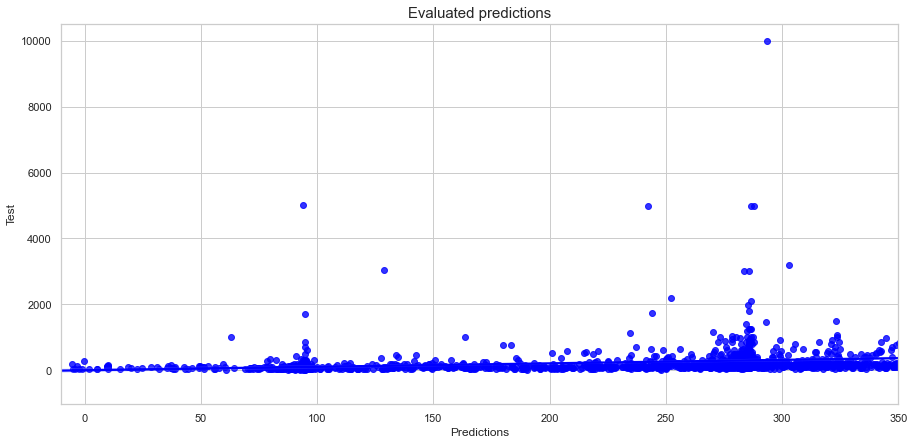

In [115]:
# Evaluated predictions

plt.figure(figsize=(15,7))
plt.xlim(-10,350)
sns.regplot(y=y_test, x=y_pred, color='blue')
plt.title('Evaluated predictions', fontsize=15)
plt.xlabel('Predictions')
plt.ylabel('Test')

## End of all answers